In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [2]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# to make the findings reproducable
np.random.seed(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-28,1123.030029,1127.530029,1103.239990,1104.729980,1104.729980,1882600
2018-03-01,1107.869995,1110.119995,1067.000977,1069.520020,1069.520020,2515900
2018-03-02,1053.079956,1081.999023,1048.114990,1078.920044,1078.920044,2271600
2018-03-05,1075.140015,1097.099976,1069.000000,1090.930054,1090.930054,1202200
2018-03-06,1099.219971,1101.849976,1089.775024,1095.060059,1095.060059,1532800
2018-03-07,1089.189941,1112.219971,1085.482056,1109.640015,1109.640015,1292500
2018-03-08,1115.319946,1127.599976,1112.800049,1126.000000,1126.000000,1355100
2018-03-09,1136.000000,1160.800049,1132.461060,1160.040039,1160.040039,2128000
2018-03-12,1163.849976,1177.050049,1157.420044,1164.500000,1164.500000,2172300


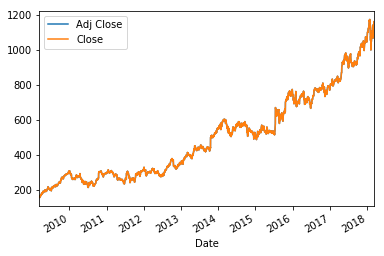

In [4]:
# Load and explore the dataset
data_spy = pd.read_csv('../data/GOOG.csv', index_col='Date', parse_dates=True)
display(data_spy.tail(10))
ax = data_spy.plot(x=data_spy.index, y=['Adj Close', 'Close'])


In [5]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('../data/GOOG.csv', 50, True)
np.shape(X_train)

         Date        Open        High         Low       Close   Adj Close  \
0  2009-03-13  161.996368  162.671982  158.484207  161.161804  161.161804   
1  2009-03-16  161.941727  163.799637  158.265640  158.812088  158.812088   
2  2009-03-17  159.055496  166.586517  158.514023  166.586517  166.586517   
3  2009-03-18  166.323227  168.901459  162.965073  165.473755  165.473755   
4  2009-03-19  164.768341  166.914383  162.632233  163.903961  163.903961   

     Volume  
0   7863500  
1   9957800  
2   9486300  
3  10089500  
4   8275800  


(1994, 50, 1)

In [6]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    60,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.011059284210205078


In [7]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=100,
    validation_split=0.05)

Train on 1894 samples, validate on 100 samples
Epoch 1/100
1894/1894 [==============================] - 1s - loss: 0.0071 - val_loss: 0.0063
Epoch 2/100
1894/1894 [==============================] - 0s - loss: 0.0034 - val_loss: 0.0019
Epoch 3/100
1894/1894 [==============================] - 0s - loss: 0.0018 - val_loss: 0.0018
Epoch 4/100
1894/1894 [==============================] - 0s - loss: 0.0021 - val_loss: 0.0026
Epoch 5/100
1894/1894 [==============================] - 0s - loss: 0.0021 - val_loss: 0.0016
Epoch 6/100
1894/1894 [==============================] - 0s - loss: 0.0019 - val_loss: 0.0024
Epoch 7/100
1894/1894 [==============================] - 0s - loss: 0.0018 - val_loss: 0.0016
Epoch 8/100
1894/1894 [==============================] - 0s - loss: 0.0020 - val_loss: 0.0015
Epoch 9/100
1894/1894 [==============================] - 0s - loss: 0.0018 - val_loss: 0.0017
Epoch 10/100
1894/1894 [==============================] - 0s - loss: 0.0016 - val_loss: 0.0016
Epoch 11/100

1894/1894 [==============================] - 0s - loss: 5.7436e-04 - val_loss: 4.1528e-04
Epoch 83/100
1894/1894 [==============================] - 0s - loss: 5.1602e-04 - val_loss: 3.3783e-04
Epoch 84/100
1894/1894 [==============================] - 0s - loss: 5.9895e-04 - val_loss: 5.7862e-04
Epoch 85/100
1894/1894 [==============================] - 0s - loss: 5.7996e-04 - val_loss: 3.6452e-04
Epoch 86/100
1894/1894 [==============================] - 0s - loss: 5.1844e-04 - val_loss: 5.2454e-04
Epoch 87/100
1894/1894 [==============================] - 0s - loss: 7.3333e-04 - val_loss: 3.2995e-04
Epoch 88/100
1894/1894 [==============================] - 0s - loss: 4.3152e-04 - val_loss: 3.1043e-04
Epoch 89/100
1894/1894 [==============================] - 0s - loss: 5.3120e-04 - val_loss: 6.1627e-04
Epoch 90/100
1894/1894 [==============================] - 0s - loss: 6.5713e-04 - val_loss: 6.3440e-04
Epoch 91/100
1894/1894 [==============================] - 0s - loss: 5.5851e-04 - val_

In [11]:
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

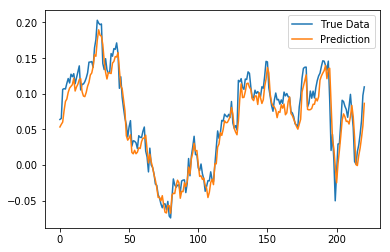

In [12]:

predictions = lstm.predict_point_by_point(model, X_test)
plot_results(predictions, y_test)